In [11]:
import pandas as pd


df_int_login = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df1_alimentacion.csv")
df_ddos = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df_alimentacion_DDOS.csv")
df_phishing = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df_prueba_phising.csv")


In [12]:
df_phishing.shape, df_ddos.shape, df_int_login.shape

((100, 57), (106, 79), (120, 16))

C:\Users\Vicen\AppData\Local\Temp\ipykernel_6548\3732104255.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


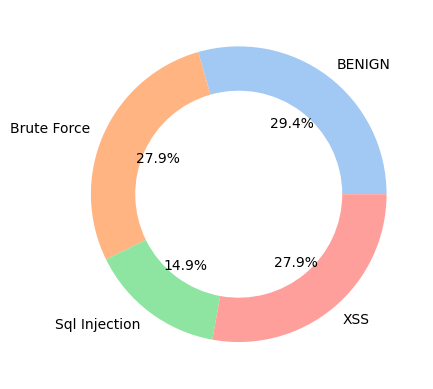

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

conn = psycopg2.connect(
    dbname="desafiogrupo1",
    user="desafiogrupo1_user",
    password="g7jS0htW8QqiGPRymmJw0IJgb04QO3Jy",
    host="dpg-d36i177fte5s73bgaisg-a.oregon-postgres.render.com",
    port="5432"
    )

cur = conn.cursor()
query = """
SELECT *
FROM public.logs
WHERE indicators IN ('BENIGN', 'XSS', 'Brute Force', 'Sql Injection')
;
"""

df = pd.read_sql(query, conn)
df_group = df.groupby('indicators')['severity'].size().reset_index(name='total')


plt.pie(df_group['total'], labels=df_group['indicators'], colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.3), autopct='%1.1f%%' )
plt.show()
conn.close()

In [2]:
from limpieza_datos2 import *

In [13]:
for i in range(30,35):
    clean_data_phishing2(df_phishing.iloc[i].to_dict())

[{'URL': 'https://www.purotip.com', 'status': 'ERROR_AUTH', 'malicious': None, 'suspicious': None, 'undetected': None, 'harmless': None, 'timeout': None, 'whois': None, 'tags': None, 'dns_records': [], 'last_dns_records_date': None, 'registrar': None, 'expiration_date': None, 'tld': None, 'issuer': None, 'subject_CN': None, 'cert_not_before': None, 'cert_not_after': None, 'cert_key_size': None, 'thumbprint_sha256': None, 'popularity_ranks': None, 'jarm': None, 'categories': None}]


KeyError: 'reputation'

In [4]:
import psycopg2

# Credenciales
DB_USER = "desafiogrupo1_user"
DB_HOST = "dpg-d36i177fte5s73bgaisg-a.oregon-postgres.render.com"
DB_NAME = "desafiogrupo1"
DB_PASS = "g7jS0htW8QqiGPRymmJw0IJgb04QO3Jy"
DB_PORT = "5432"

try:
    # Crear conexión
    conn = psycopg2.connect(
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASS,
        host=DB_HOST,
        port=DB_PORT
    )

    # Crear cursor
    cur = conn.cursor()

    # Probar con una consulta
    cur.execute("SELECT * FROM logs ORDER BY time DESC LIMIT 5;")
    cur.fetchone()
    for row in cur.fetchall():
        print(row)

    # Probar con una consulta
    cur.execute("SELECT * FROM ddos ORDER BY time DESC LIMIT 5;")
    cur.fetchone()
    for row in cur.fetchall():
        print(row)

    # Cerrar
    cur.close()
    conn.close()

except Exception as e:
    print("Error de conexión:", e)

(631184, 1, 'Nuevo', 'Info', 'BENIGN', 0, datetime.date(2025, 9, 24), datetime.time(23, 54, 46), '1')
(485459, 1, 'Nuevo', 'Info', 'BENIGN', 0, datetime.date(2025, 9, 24), datetime.time(23, 54, 45), '1')
(423237, 1, 'Nuevo', 'Info', 'BENIGN', 0, datetime.date(2025, 9, 24), datetime.time(23, 54, 43), '1')
(931344, 1, 'Nuevo', 'Info', 'BENIGN', 0, datetime.date(2025, 9, 24), datetime.time(23, 54, 42), '1')
(5, 631184, 80, 116253700, 47, 72, 7768182862.0, 1023623334.0, 3259574468.0, 8912830507.0, 0, 2920, 9852008475.0, 2940882371.0, 0, 0, 1.0, 1029444545.0, 10000000.0, 'BENIGN', 'Benign', 0, 'Info', 'HTTP', 'Tráfico web sin TLS. Expuesto a robo/manipulación de datos (MITM) y vulnerabilidades de aplicaciones web (XSS, SQLi, RCE) y del propio servidor.', 'Fallos en frameworks/servidores web y módulos (p. ej., deserialización, path traversal).', 'Redirigir 80→443, WAF, cabeceras seguras (HSTS/CSP), hardening del servidor, parches continuos y pruebas SAST/DAST.', '2025-09-24', '23:54:46')
(4,